# Somatotopy code tutorial 1- hand creation and analysis

In this demo we will create a hand shape and run analysis on it.

In [1]:
# import relevant packages
%load_ext autoreload
%autoreload 2

import touchsim as ts
from touchsim.plotting import plot, figsave
from IPython.display import Image
import numpy as np
import holoviews as hv
hv.notebook_extension()
%output holomap='scrubber' # animate holomaps
import somatotopic_maps as sp
hv.extension('matplotlib')
import pickle

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Create the hand population

### Hand population using any surface
The first example takes an image of a toy hand, reads it in and turns it into a hand surface object. We will then add SA1 afferents to this surface.

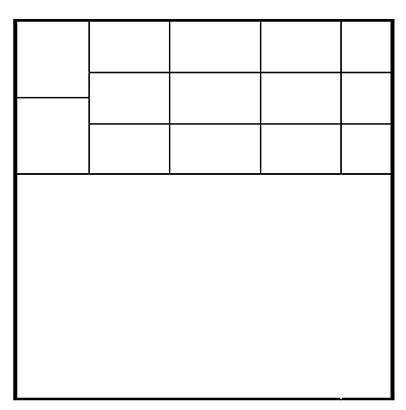

In [2]:
# View the surface that will be used for the hand
image_filename = "toy_hand_sub@0,2x.png"
Image(filename = image_filename)

In [3]:
# Adds location tags for each area. You will need to specify these after checking the boundary locations.
hand_tags = [('D1d_t'), ('D2d_t'), ('D3d_t'), ('D4d_t'), ('D5d_t'), ('D2m_f'), 
         ('D3m_f'), ('D4m_f'), ('D5m_f'), ('D1p_f'), ('D2p_f'), ('D3p_f'), 
         ('D4p_f'),('D5p_f'),('Pwp')]

# set up the density of each afferent class and region.
hand_density = {('SA1','p'):10.,('RA','p'):25., ('PC','p'):10.,
           ('SA1','f'):30.,('RA','f'):40., ('PC','f'):10.,
           ('SA1','t'):70.,('RA','t'):140., ('PC','t'):25.,}

In [4]:
# Create SA1 afferent population using the surface. 
# We will add half of the normal density of SA1s by setting the density multiplier to 0.5.
# All afferent population types can be added by removing affclass specification: affclass='SA1'

hand_pop = sp.hand_data( hand_tags=hand_tags, hand_density=hand_density, image_filename=image_filename, 
                         affclass='SA1', density_multiplier=0.5)

:Overlay
   .Path.I   :Path   [x,y]
   .Labels.I :Labels   [x,y]   (Label)
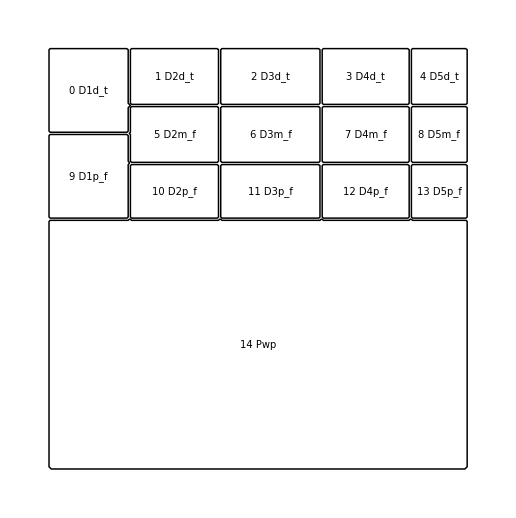

In [5]:
# Open the surface and display the regions
%output size=250
plot(hand_pop.ts_hand.surface,tags=True)

:Overlay
   .NdOverlay.I :NdOverlay   [Element]
      :Points   [x,y]
   .Path.I      :Path   [x,y]
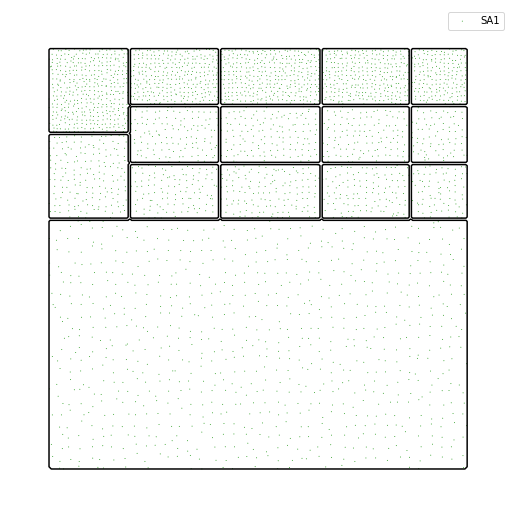

In [6]:
# plot the afferents in the toy hand population
plot(hand_pop.ts_hand) * plot(hand_pop.ts_hand.surface)

### Hand population using pre-defined hand shape

Next, we will now use the pre-defined touch-sim hand shape and add a population of SA1 afferents. We will add half of the normal density of SA1s by setting the density multiplier to 0.25.

In [7]:
hand_pop = sp.hand_data(affclass='SA1', density_multiplier=0.25)

In [8]:
# check the hand pop has been created, and the number of regions it contains.
print(hand_pop.ts_hand.surface)

Surface with 20 regions.


:Overlay
   .Path.I   :Path   [x,y]
   .Labels.I :Labels   [x,y]   (Label)
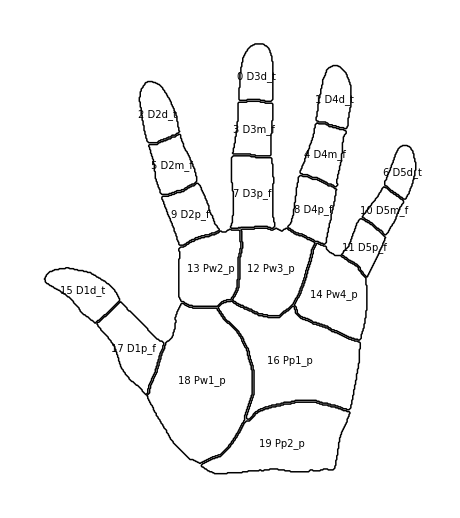

In [9]:
# plot the hand surface with regions labelled.
%output size=250
plot(hand_pop.ts_hand.surface,tags=True) 

:Overlay
   .NdOverlay.I :NdOverlay   [Element]
      :Points   [x,y]
   .Path.I      :Path   [x,y]
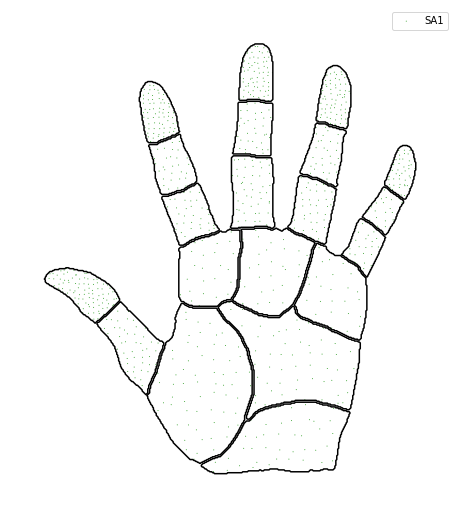

In [10]:
# plot the afferents in the hand population
plot(hand_pop.ts_hand) * plot()

In [11]:
# save the hand pop
with open('hand_pop_obj1.pkl', 'wb') as file:
    pickle.dump(hand_pop, file)

## Investigating the hand population

Now we will analyse the hand shape some more. We will calculate:
- Region properties dictionary
- Plots showing the area sizes of each hand pop region (can be main regions only, such as a whole finger, or sub regions like the finger tip.)
- A distance matrix showing euclidean distances between the center coordinates of each region.
- Hand mesh 

### Region properties dictionary

Information about the hand pop surface can be added into a dictionary (region properties dictionary). 
This makes it easier to perform some analysis. The dictionary will return:
- Coordinates of afferents located in that region (in both coordinate systems)
- Indexes of the region afferents in the full list.
- Centre points of the regions
- Area sizes of the regions
- Color codes

The region properties dictionary can be made for both main regions and sub regions.

In [12]:
# get dictionary of region properties for main regions
region_properties = hand_pop.hand_rp_main

In [13]:
# look at region list 
list(region_properties.keys())

['D3', 'D4', 'D2', 'D5', 'Pw', 'D1', 'Pp']

In [14]:
# View a list of information available for a region eg. D1
list(region_properties['D1'].keys())

['locs_pixel',
 'locs_hand',
 'index',
 'color',
 'centroid',
 'centroid_pixel',
 'area_size',
 'area_size_per']

In [15]:
# get the area size of one of the regions
region_properties['D1']['area_size']

1262.2279081999982

In [16]:
# get the centroid of one of the regions
region_properties['D1']['centroid']

array([ 87.43152831, -55.03739914])

In [17]:
# get the centroid of one of the regions
region_properties['D3']['centroid']

array([24.39178183, 41.73140191])

In [18]:
# get the rgb colors of one of the regions
region_properties['D3']['color']

[1, 1, 0]

## Plotting information in the hand pop

### Region area sizes

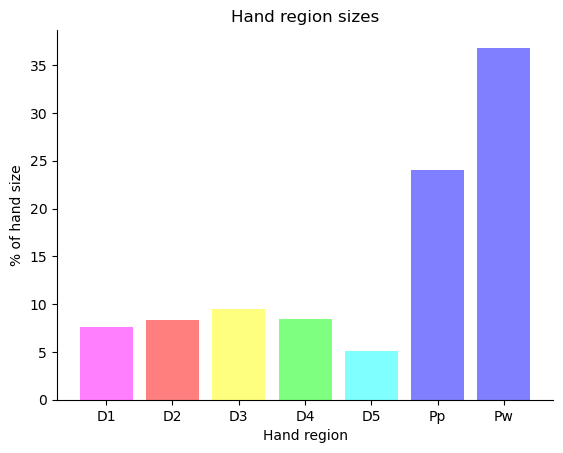

In [19]:
# Create a bar chart showing the percentage area sizes of each region - main hand regions only. Colours indicate the region.

_, area_main_per, hand_area_main_tags = sp.get_hand_area_sizes(hand_pop.hand_rp_main)
sp.hand_area_sizes_plot(area_main_per, hand_pop.hand_rp_main, hand_area_main_tags)


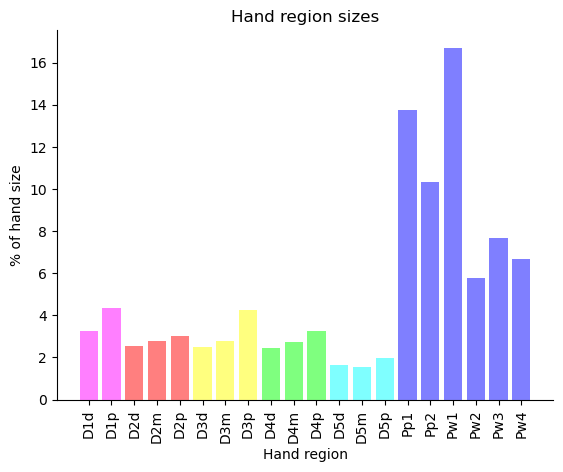

In [20]:
# Create a bar chart showing the percentage area sizes of each region -sub hand regions

region_properties_sub = hand_pop.hand_rp_sub

_, area_sub_per, hand_area_sub_tags = sp.get_hand_area_sizes(hand_pop.hand_rp_sub)
sp.hand_area_sizes_plot(area_sub_per, hand_pop.hand_rp_sub, hand_area_sub_tags, type_hand='sub')


### Region centroids
#### All centroids

:Overlay
   .Path.I   :Path   [x,y]
   .Points.I :Points   [x,y]
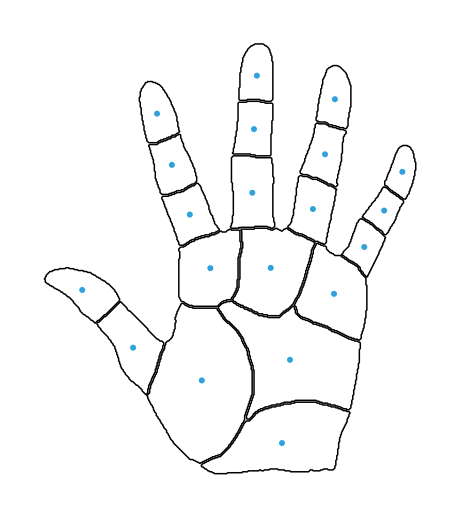

In [21]:
# plot the centroids on the hand shape- sub regions
plot(hand_pop.ts_hand.surface) * hv.Points(hand_pop.ts_hand.surface._centers)


#### Centroids for the main hand regions only eg. digits, palm

:Overlay
   .Path.I   :Path   [x,y]
   .Points.I :Points   [x,y]
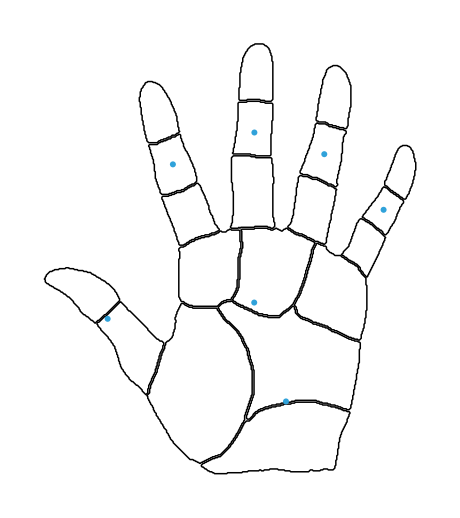

In [22]:
# plot the centroids on the hand shape- main regions
centroids = sp.get_centroids(hand_pop.hand_rp_main)[0]
plot(hand_pop.ts_hand.surface) * hv.Points(centroids) 

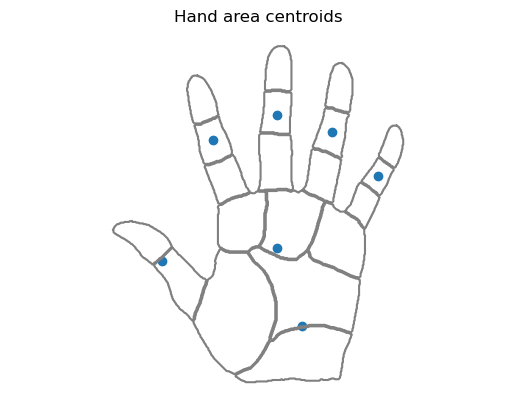

In [23]:
# another way plot the centroids on the hand shape- main regions
sp.plot_centroids(centroids, hand_pop)

## Euclidean distances of centroids

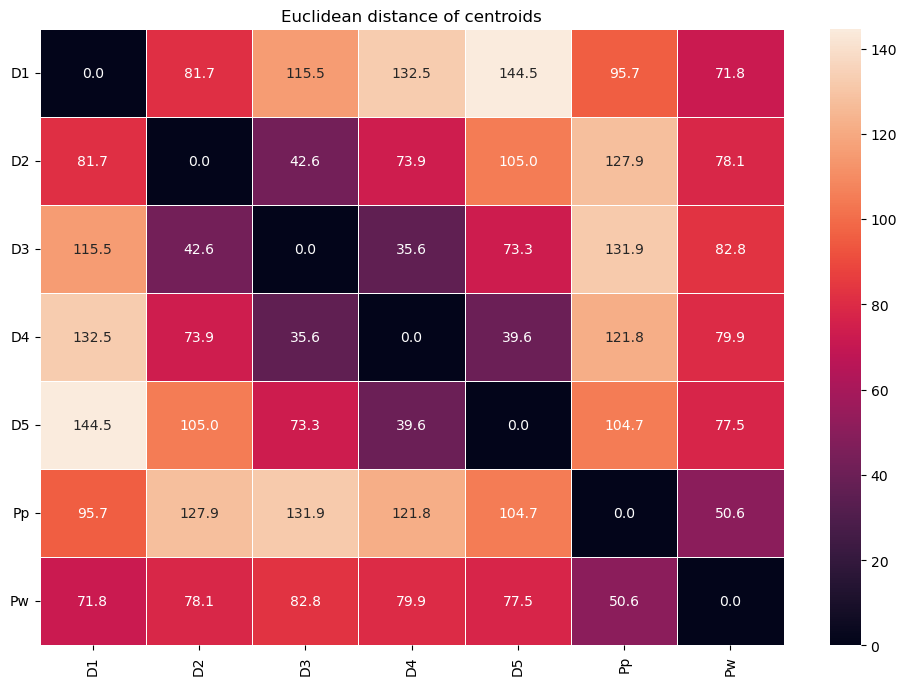

In [24]:
# Calculate a heatmap of Euclidean distances between the centroid of each hand region- main regions.
hand_distances = sp.calc_hand_distances(hand_pop.hand_rp_main)
sp.plot_hand_distances(hand_distances)

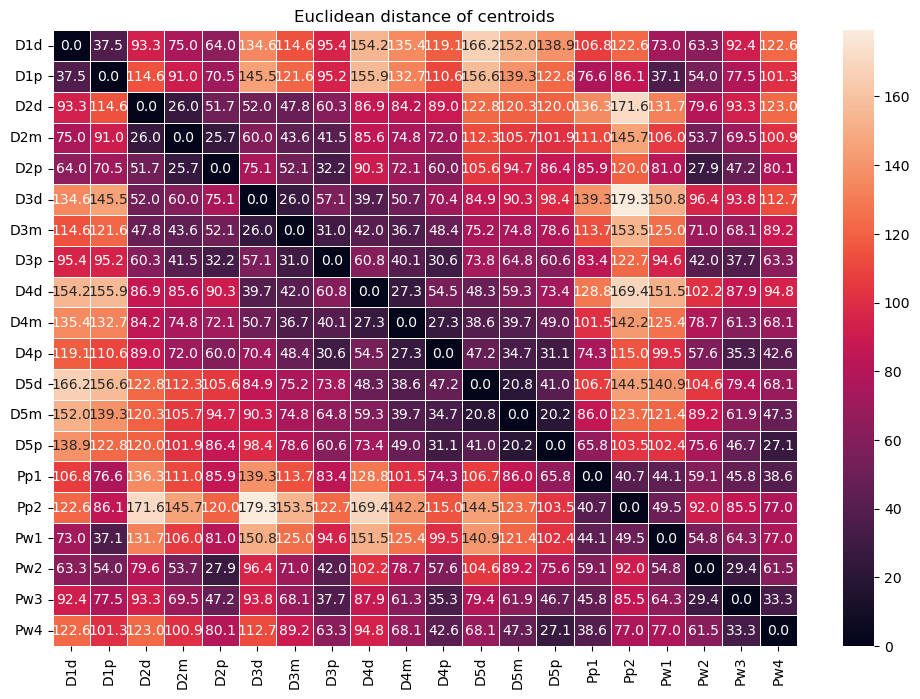

In [25]:
# Calculate a heatmap of Euclidean distances between the centroid of each hand region- sub regions.
hand_distances_sub = sp.calc_hand_distances(hand_pop.hand_rp_sub)
sp.plot_hand_distances(hand_distances_sub)

#### Get distance of any two points
Return the distance of any two specified points

In [26]:
# two distances for main regions
sp.hand_distances_pair(hand_distances,'D2','D1')

81.65345649267533

In [27]:
# two distances for sub regions
sp.hand_distances_pair(hand_distances_sub,'D2d','D1p')

114.55489612518204

## Hand mesh
The hand mesh can be use to calculate distances along the hand in a structured way. The hand mesh can be compared with the same mesh drawn on the map to check the shape of the hand representation.

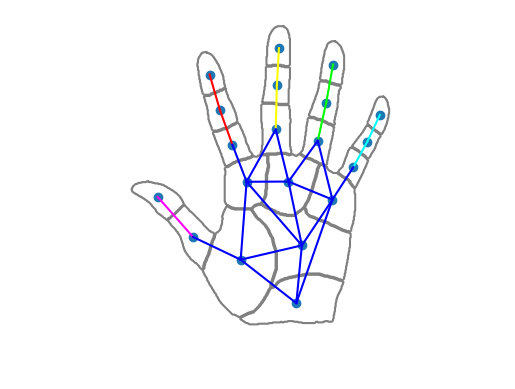

In [28]:
sp.hand_mesh(hand_pop)
%output size=250

### Distances along the mesh
Distances along the mesh are calculated using a graph network. Shortest path is calculated between two nodes.

In [29]:
# Generate the graph
hand_graph = sp.mesh_as_graph(hand_pop.hand_rp_sub)

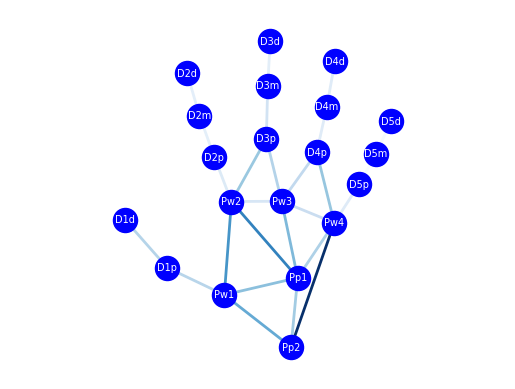

In [30]:
# Draw the graph nodes and edges
c = sp.draw_graph(hand_graph)

#### Calculate the shortest distance between two nodes

In [31]:
# Example 1- Pp2 and D1d
sp.mesh_distance_pair('D1d','Pp2',hand_graph)

124.08140476918436

In [32]:
# Example 2- D1d and D5d
sp.mesh_distance_pair('D1d','D5d',hand_graph)

225.4839609471888

#### Calculate the shortest distance between all included nodes on the mesh

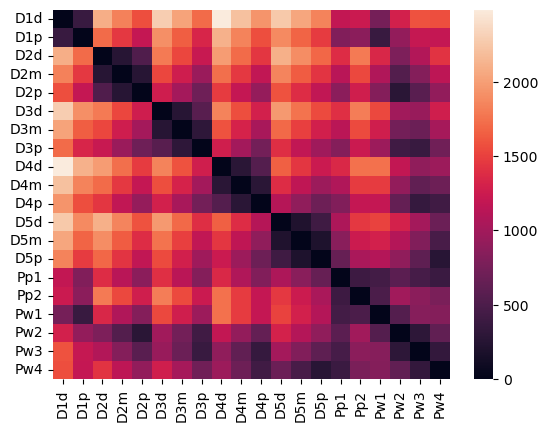

In [33]:
sp.mesh_distance_all(hand_graph)